[View in Colaboratory](https://colab.research.google.com/github/Gregory-Eales/Simple-Support-Vector-Machine/blob/master/Simple_Support_Vector_Machine.ipynb)

In [0]:
# import dependencies
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# support vector machine class
class SupportVectorMachine(object):
    
    # initiate variables
    def __init__(self):
      self.weights = np.random.rand(1, 3)
      self.bias = np.zeros([1, 1])
      self.epochs = 1000
      self.alpha = 0.1
      self.errors = []
    
    # optimize
    def optimize(self, X, Y):
      
      # iterate through training loop
      for epoch in range(1, self.epochs):
        
        # set error to zero
        error = 0
        
        # train weights on each data sample
        for i, x in enumerate(X):
          
          
          # if data sample misclassified
          if  (Y[i]*np.dot(X[i], self.weights.T)) < 1: 
            
            # update weights when misclassified
            self.weights = self.weights + (self.alpha * ( (X[i]*Y[i]) + ( -2*(1/epoch)*self.weights) ) )
            error = 1
            
          # if data sample correctly classified  
          else:
            
            # update weights with regulizer term
            self.weights = self.weights + (self.alpha * (-2/epoch) * self.weights)
        
        # record error
        self.errors.append(error)
                            
          
        
      

In [0]:
# generates gaussian classification data set
def generate_data(data_points):
  X = []
  Y = []
  
  # generate data of type -1
  for point in range(data_points):
    X.append(np.array([1, np.random.normal([10], scale=1), np.random.normal([10], scale=1)]))
    Y.append(-1)
    
  #generate data of type 1
  for point in range(data_points):
    X.append(np.array([1, np.random.normal([5], scale=1), np.random.normal([5], scale=1)]))
    Y.append(1)
    
  return X, Y

In [0]:
# graphs data
def graph_data(X):
  
  # initiate data holders
  x = []
  y = []
  
  # divide data into little x and y
  for i in X:
    x.append(i[1])
    y.append(i[2])
  
  # scatter plot
  plt.scatter(x[0:5], y[0:5])
  plt.scatter(x[5:10], y[5:10])
  plt.show()

In [0]:
 X, Y = generate_data(5)

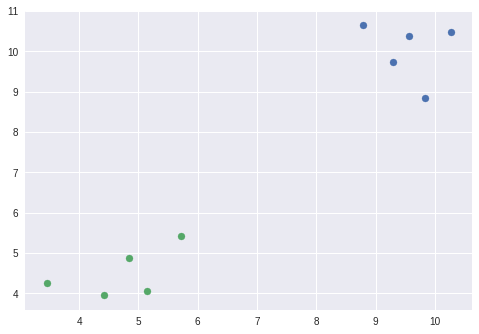

In [247]:
graph_data(X)

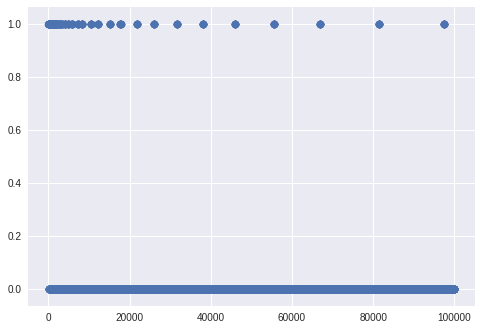

In [250]:
SVM = SupportVectorMachine()
SVM.epochs = 100000
SVM.optimize(X, Y)
x = []
for i in range(len(SVM.errors)):
  x.append(i)
plt.scatter(x, SVM.errors)
plt.show()

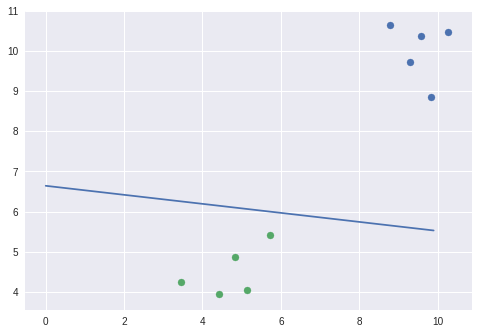

In [251]:
def graph_prediction(SVM, X):
  w1, w2, b = SVM.weights[0][1], SVM.weights[0][2], SVM.weights[0][0]  
  w1 = float(w1)
  w2 = float(w2)
  b = float(b)
  dbx = []
  dby = []
  # X*W1 + Y*W2 + B = 1
  # Y = (1 - W1 * X - B) / W2
  for i in range(100):
    dbx.append(i/10)
    dby.append((1.0 - w1 * i/10 - b) / w2)
  plt.plot(dbx, dby)
  
  x = []
  y = []
  
  # divide data into little x and y
  for i in X:
    x.append(i[1])
    y.append(i[2])
  
  # scatter plot
  plt.scatter(x[0:5], y[0:5])
  plt.scatter(x[5:10], y[5:10])
  plt.show()
  
graph_prediction(SVM, X)